# Cuestionamiento 3: Existe una relacion entre el exito ($ y ratings) de una pelicula y el director y/o budget?

Data exploration

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
# Import csv files
movies = pd.read_csv('IMDb_movies.csv')
actors = pd.read_csv('IMDb_names.csv')
ratings = pd.read_csv('IMDb_ratings.csv')
title_principals = pd.read_csv('IMDb_title_principals.csv')

In [3]:
movies = pd.DataFrame(movies)
actors = pd.DataFrame(actors)
ratings = pd.DataFrame(ratings)
title_principals = pd.DataFrame(title_principals)

In [4]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

Cleaning Data

In [6]:
movies = pd.merge(movies,ratings[['imdb_title_id','us_voters_rating','us_voters_votes','non_us_voters_rating','non_us_voters_votes']],on='imdb_title_id',how='left')
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,$ 2250,NaN,NaN,NaN,7.0,7.0,6.0,89.0,6.2,309.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,NaN,NaN,NaN,4.0,2.0,6.2,27.0,6.0,114.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,$ 45000,NaN,NaN,NaN,24.0,3.0,5.5,197.0,4.7,103.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,NaN,NaN,NaN,28.0,14.0,7.1,452.0,7.0,1076.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,NaN,NaN,NaN,NaN,12.0,5.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,NaN,NaN,NaN,NaN,21.0,NaN,5.0,14.0,7.1,45.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,INR 4000000,NaN,$ 4791,NaN,NaN,NaN,NaN,NaN,1.0,3.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,INR 10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [7]:
# Delet columns that we don't need, drop all NaN and reset index
movies = movies.drop(['reviews_from_users','reviews_from_critics','original_title','duration','description'],axis=1)
movies = movies.dropna(how='any')

# Delet budget and gross income in other currencies
movies = movies[~movies['budget'].str.match(r'([A-Z]+)')]
movies = movies[~movies['usa_gross_income'].str.match(r'($[A-Z]+\w)')]
movies = movies[~movies['worlwide_gross_income'].str.match(r'($[A-Z]+\w)')]

# Delet '$' symbol from table
movies['budget'] = movies['budget'].str.replace('$','')
movies['usa_gross_income'] = movies['usa_gross_income'].str.replace('$','')
movies['worlwide_gross_income'] = movies['worlwide_gross_income'].str.replace('$','')

movies = movies.reset_index(drop=True)

movies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,8.5,152716,1500000,19181,32609,99.0,8.5,26265.0,8.5,69116.0
1,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,8.5,197969,1500000,163577,445226,96.0,8.5,28002.0,8.5,92614.0
2,tt0029583,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,7.6,168735,1499000,184925486,184925486,95.0,7.7,37903.0,7.6,70466.0
3,tt0031381,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,8.1,269664,3977000,200852579,402352579,97.0,8.2,63770.0,8.1,108032.0
4,tt0031679,Mr. Smith Goes to Washington,1939,1940-05-03,"Comedy, Drama",USA,English,Frank Capra,"Sidney Buchman, Lewis R. Foster",Columbia Pictures,...,8.1,100206,1900000,144738,144738,73.0,8.3,34275.0,8.0,32212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,tt8772262,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery","USA, Sweden, Hungary","English, Swedish",Ari Aster,Ari Aster,Proton Cinema,...,7.2,78830,10000000,27426361,41123770,72.0,7.5,12466.0,7.1,29604.0
5910,tt9024106,Unplanned,2019,2019-10-04,"Biography, Drama",USA,English,"Chuck Konzelman, Cary Solomon","Abby Johnson, Chuck Konzelman",Unplanned Movie,...,5.8,10783,6000000,19005109,19320481,10.0,6.1,2376.0,4.8,2524.0
5911,tt9082020,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller","France, Ukraine, Belgium","French, English",Frédéric Petitjean,Frédéric Petitjean,Ascot Elite Entertainment Group,...,4.5,2193,2700000,5083,1009888,25.0,4.5,214.0,4.5,1056.0
5912,tt9134216,Playing with Fire,2019,2019-11-08,"Comedy, Family",USA,English,Andy Fickman,"Dan Ewen, Matt Lieberman",Broken Road Productions,...,4.5,1067,29900000,18847824,21788746,24.0,4.7,336.0,4.3,190.0


In [8]:
# Convert budget and gross income to number
movies['budget'] = pd.to_numeric(movies['budget'])
movies['usa_gross_income'] = pd.to_numeric(movies['usa_gross_income'])
movies['worlwide_gross_income'] = pd.to_numeric(movies['worlwide_gross_income'])

# Transform values to k
movies['budget'] = movies['budget']/100
movies['usa_gross_income'] = movies['usa_gross_income']/100
movies['worlwide_gross_income'] = movies['worlwide_gross_income']/100

In [9]:
# Create revenues from income minus budget
revenue_us = movies['usa_gross_income'] - movies['budget']
revenue_ww = movies['worlwide_gross_income'] - movies['budget']

# Add values to dataframe
movies['revenue_usa'] = revenue_us
movies['revenue_worlwide'] = revenue_ww

# Display preview of new columns
movies[['title','budget','usa_gross_income','worlwide_gross_income','revenue_usa','revenue_worlwide']]

,title,budget,usa_gross_income,worlwide_gross_income,revenue_usa,revenue_worlwide
0,City Lights,15000.0,191.81,326.09,-14808.19,-14673.91
1,Modern Times,15000.0,1635.77,4452.26,-13364.23,-10547.74
2,Snow White and the Seven Dwarfs,14990.0,1849254.86,1849254.86,1834264.86,1834264.86
3,Gone with the Wind,39770.0,2008525.79,4023525.79,1968755.79,3983755.79
4,Mr. Smith Goes to Washington,19000.0,1447.38,1447.38,-17552.62,-17552.62
...,...,...,...,...,...,...
5909,Midsommar,100000.0,274263.61,411237.70,174263.61,311237.70
5910,Unplanned,60000.0,190051.09,193204.81,130051.09,133204.81
5911,Cold Blood Legacy,27000.0,50.83,10098.88,-26949.17,-16901.12
5912,Playing with Fire,299000.0,188478.24,217887.46,-110521.76,-81112.54


Summary stats

In [10]:
# All outliers
budget = movies['budget']
budget_quartiles = budget.quantile([.25,.5,.75])
budget_lowerq = budget_quartiles[0.25]
budget_upperq = budget_quartiles[0.75]
budget_iqr = budget_upperq - budget_lowerq
budget_lower_bound = budget_lowerq - (1.5 * budget_iqr)
budget_upper_bound = budget_upperq + (1.5 * budget_iqr)

usrevenue = movies['revenue_usa']
usrevenue_quartiles = usrevenue.quantile([.25,.5,.75])
usrevenue_lowerq = usrevenue_quartiles[0.25]
usrevenue_upperq = usrevenue_quartiles[0.75]
usrevenue_iqr = usrevenue_upperq - usrevenue_lowerq
usrevenue_lower_bound = usrevenue_lowerq - (1.5 * usrevenue_iqr)
usrevenue_upper_bound = usrevenue_upperq + (1.5 * usrevenue_iqr)

wwrevenue = movies['revenue_worlwide']
wwrevenue_quartiles = wwrevenue.quantile([.25,.5,.75])
wwrevenue_lowerq = wwrevenue_quartiles[0.25]
wwrevenue_upperq = wwrevenue_quartiles[0.75]
wwrevenue_iqr = wwrevenue_upperq - wwrevenue_lowerq
wwrevenue_lower_bound = wwrevenue_lowerq - (1.5 * wwrevenue_iqr)
wwrevenue_upper_bound = wwrevenue_upperq + (1.5 * wwrevenue_iqr)

usratings = movies['us_voters_rating']
usratings_quartiles = usratings.quantile([.25,.5,.75])
usratings_lowerq = usratings_quartiles[0.25]
usratings_upperq = usratings_quartiles[0.75]
usratings_iqr = usratings_upperq - usratings_lowerq
usratings_lower_bound = usratings_lowerq - (1.5 * usratings_iqr)
usratings_upper_bound = usratings_upperq + (1.5 * usratings_iqr)

wwratings = movies['avg_vote']
wwratings_quartiles = wwratings.quantile([.25,.5,.75])
wwratings_lowerq = wwratings_quartiles[0.25]
wwratings_upperq = wwratings_quartiles[0.75]
wwratings_iqr = wwratings_upperq - wwratings_lowerq
wwratings_lower_bound = wwratings_lowerq - (1.5 * wwratings_iqr)
wwratings_upper_bound = wwratings_upperq + (1.5 * wwratings_iqr)

# Only deleted budget outliers
movies2 = movies.loc[budget_lower_bound < movies['budget']]
movies2 = movies2.loc[movies['budget'] < budget_upper_bound]
  
#    ( (usrevenue_lower_bound < movies['revenue_usa']) | (movies['revenue_usa'] < usrevenue_upper_bound) ) &
#    ( (wwrevenue_lower_bound < movies['revenue_worlwide']) | (movies['revenue_worlwide'] < wwrevenue_upper_bound) ) &   ( (usratings_lower_bound < movies['us_voters_rating']) | (movies['us_voters_rating'] < usratings_upper_bound) ) &   ( (wwratings_lower_bound < movies['avg_vote']) | (movies['avg_vote'] < wwratings_upper_bound) )

movies2.shape

(5400, 23)

In [73]:
# General information of database
director_movies = movies2['director'].value_counts()
max_movie = director_movies.max()

directors = len(movies2['director'].unique())

max_year = movies2['year'].max()
min_year = movies2['year'].min()

min_budget = movies2['budget'].min()
max_budget = movies2['budget'].max()

print(f'There are {directors} directors, from {min_year} to {max_year}, budget ranges from {min_budget} to {max_budget}, the maximum movies by a director is {max_movie}')

There are 2542 directors, from 1931 to 2019, budget ranges from 0.2 to 880000.0, the maximum movies by a director is 33


In [12]:
# Stats information by director
director_sum = movies2.groupby('director').sum()
director_mean = movies2.groupby('director').mean()
director_median = movies2.groupby('director').median()
director_var = movies2.groupby('director').var()
director_sem = movies2.groupby('director').sem()

Generate plots

The correlation between the average budget and the average revenue in US is 0.1


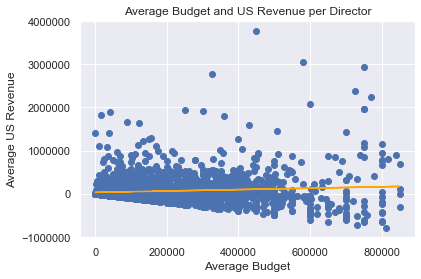

In [15]:
# Budget vs US revenue
plt.scatter(director_mean['budget'],director_mean['revenue_usa'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['revenue_usa'])[0],2)
print(f"The correlation between the average budget and the average revenue in US is {corr}")
model = st.linregress(director_mean['budget'],director_mean['revenue_usa'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Revenue')
plt.title('Average Budget and US Revenue per Director')
sns.set()
plt.show()

The correlation between the average budget and the average revenue Worldwide is 0.4


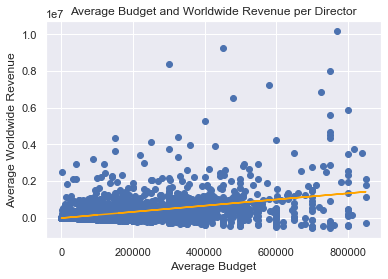

In [14]:
# Budget vs Worldwide revenue
plt.scatter(director_mean['budget'],director_mean['revenue_worlwide'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['revenue_worlwide'])[0],2)
print(f"The correlation between the average budget and the average revenue Worldwide is {corr}")
model = st.linregress(director_mean['budget'],director_mean['revenue_worlwide'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Revenue')
plt.title('Average Budget and Worldwide Revenue per Director')
sns.set()
plt.show()


The correlation between the average budget and the average ratings in US is -0.02


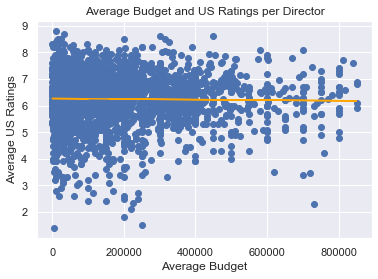

In [16]:
# US budget vs ratings
plt.scatter(director_mean['budget'],director_mean['us_voters_rating'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['us_voters_rating'])[0],2)
print(f"The correlation between the average budget and the average ratings in US is {corr}")
model = st.linregress(director_mean['budget'],director_mean['us_voters_rating'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Ratings')
plt.title('Average Budget and US Ratings per Director')
sns.set()
plt.show()

The correlation between the average budget and the average ratings Worldwide is 0.02


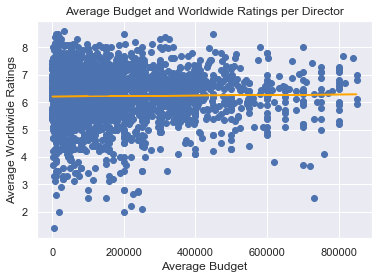

In [17]:
# WW budget vs ratings
plt.scatter(director_mean['budget'],director_mean['avg_vote'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['avg_vote'])[0],2)
print(f"The correlation between the average budget and the average ratings Worldwide is {corr}")
model = st.linregress(director_mean['budget'],director_mean['avg_vote'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Ratings')
plt.title('Average Budget and Worldwide Ratings per Director')
sns.set()
plt.show()

In [ ]:
# top_movies = 

In [18]:
recent_movies = movies.loc[movies['year']>2009]

In [19]:
# All outliers
budget = recent_movies['budget']
budget_quartiles = budget.quantile([.25,.5,.75])
budget_lowerq = budget_quartiles[0.25]
budget_upperq = budget_quartiles[0.75]
budget_iqr = budget_upperq - budget_lowerq
budget_lower_bound = budget_lowerq - (1.5 * budget_iqr)
budget_upper_bound = budget_upperq + (1.5 * budget_iqr)

print(recent_movies.shape)

# Only deleted budget outliers
recent_movies = recent_movies.loc[budget_lower_bound < recent_movies['budget']]
print(recent_movies.shape)

recent_movies = recent_movies.loc[recent_movies['budget'] < budget_upper_bound]
print(recent_movies.shape)

(1953, 23)
(1953, 23)
(1752, 23)


In [20]:
# General information of database
recent_director_movies = recent_movies['director'].value_counts()
recent_max_movie = recent_director_movies.max()

recent_directors = len(recent_movies['director'].unique())

recent_max_year = recent_movies['year'].max()
recent_min_year = recent_movies['year'].min()

recent_min_budget = recent_movies['budget'].min()
recent_max_budget = recent_movies['budget'].max()

print(f'There are {recent_directors} directors, from {recent_min_year} to {recent_max_year}, budget ranges from {recent_min_budget} to {recent_max_budget}, the maximum movies by a director is {recent_max_movie}')

recent_movies.shape

There are 1188 directors, from 2010 to 2019, budget ranges from 120.0 to 1120000.0, the maximum movies by a director is 11


(1752, 23)

In [21]:
# Stats information by director
recent_director_sum = recent_movies.groupby('director').sum()
recent_director_mean = recent_movies.groupby('director').mean()
recent_director_median = recent_movies.groupby('director').median()
recent_director_var = recent_movies.groupby('director').var()
recent_director_sem = recent_movies.groupby('director').sem()

The correlation between the average budget and the average revenue in US in the last decade is 0.05


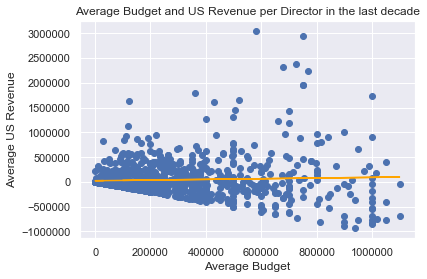

In [22]:
# Budget vs US revenue
plt.scatter(recent_director_mean['budget'],recent_director_mean['revenue_usa'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['revenue_usa'])[0],2)
print(f"The correlation between the average budget and the average revenue in US in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['revenue_usa'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Revenue')
plt.title('Average Budget and US Revenue per Director in the last decade')
sns.set()
plt.show()

The correlation between the average budget and the average revenue Worldwide in the last decade is 0.48


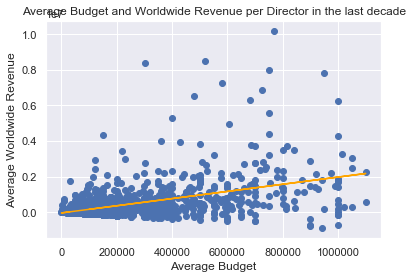

In [23]:
# Budget vs Worldwide revenue
plt.scatter(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])[0],2)
print(f"The correlation between the average budget and the average revenue Worldwide in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['revenue_worlwide'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Revenue')
plt.title('Average Budget and Worldwide Revenue per Director in the last decade')
sns.set()
plt.show()

The correlation between the average budget and the average ratings in US in the last decade is 0.06


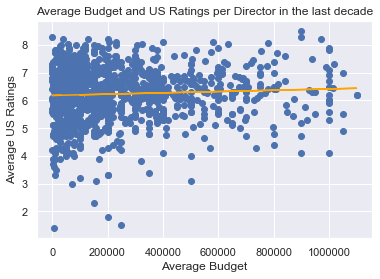

In [24]:
# US budget vs ratings
plt.scatter(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])[0],2)
print(f"The correlation between the average budget and the average ratings in US in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['us_voters_rating'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average US Ratings')
plt.title('Average Budget and US Ratings per Director in the last decade')
sns.set()
plt.show()

The correlation between the average budget and the average ratings Worldwide in the last decade is 0.1


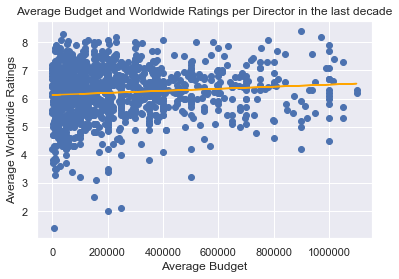

In [25]:
# WW budget vs ratings
plt.scatter(recent_director_mean['budget'],recent_director_mean['avg_vote'])
corr=round(st.pearsonr(recent_director_mean['budget'],recent_director_mean['avg_vote'])[0],2)
print(f"The correlation between the average budget and the average ratings Worldwide in the last decade is {corr}")
model = st.linregress(recent_director_mean['budget'],recent_director_mean['avg_vote'])
y_values = recent_director_mean['budget']*model[0]+model[1]
plt.plot(recent_director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Worldwide Ratings')
plt.title('Average Budget and Worldwide Ratings per Director in the last decade')
sns.set()
plt.show()

In [31]:
top15_usmovies = movies.nlargest(15,['revenue_usa'])
top15_wwmovies = movies.nlargest(15,['revenue_worlwide'])

In [30]:
top15_usmovies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,...,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,revenue_usa,revenue_worlwide
5252,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,2015-12-17,"Action, Adventure, Sci-Fi",USA,English,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams",Lucasfilm,...,2450000.0,9366622.25,20682236.24,81.0,8.1,99635.0,7.8,286035.0,6916622.25,18232236.24
3549,tt0499549,Avatar,2009,2009-12-17,"Action, Adventure, Fantasy",USA,"English, Spanish",James Cameron,James Cameron,Twentieth Century Fox,...,2370000.0,7605076.25,27899683.01,83.0,7.7,163367.0,7.8,509994.0,5235076.25,25529683.01
5579,tt4154796,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,...,3560000.0,8583730.00,27978005.64,78.0,8.6,62675.0,8.3,188853.0,5023730.00,24418005.64
2811,tt0369610,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",USA,English,Colin Trevorrow,"Rick Jaffa, Amanda Silver",Universal Pictures,...,1500000.0,6522706.25,16704006.37,59.0,7.1,71157.0,6.8,211733.0,5022706.25,15204006.37
4869,tt1825683,Black Panther,2018,2018-02-13,"Action, Adventure, Sci-Fi",USA,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler,"Ryan Coogler, Joe Robert Cole",Marvel Studios,...,2000000.0,7000595.66,13469131.61,88.0,7.6,73867.0,7.0,183811.0,5000595.66,11469131.61
1444,tt0120338,Titanic,1997,1998-01-23,"Drama, Romance",USA,"English, Swedish, Italian",James Cameron,James Cameron,Twentieth Century Fox,...,2000000.0,6593639.44,21874639.44,75.0,7.7,154673.0,7.7,417277.0,4593639.44,19874639.44
178,tt0076759,Star Wars,1977,1977-12-27,"Action, Adventure, Fantasy",USA,English,George Lucas,George Lucas,Lucasfilm,...,110000.0,4609985.07,7755120.64,90.0,8.9,224057.0,8.5,443071.0,4499985.07,7645120.64
328,tt0083866,E.T. the Extra-Terrestrial,1982,1982-12-10,"Family, Sci-Fi",USA,English,Steven Spielberg,Melissa Mathison,Universal Pictures,...,105000.0,4351105.54,7929105.54,91.0,8.0,73805.0,7.8,151803.0,4246105.54,7824105.54
5494,tt3606756,Incredibles 2,2018,2018-07-13,"Animation, Action, Adventure",USA,English,Brad Bird,Brad Bird,Walt Disney Pictures,...,2000000.0,6085817.44,12428053.59,80.0,7.8,32239.0,7.5,74853.0,4085817.44,10428053.59
3735,tt0848228,The Avengers,2012,2012-04-26,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",Marvel Studios,...,2200000.0,6233579.10,15188129.88,69.0,8.3,160904.0,7.9,462139.0,4033579.10,12988129.88


In [32]:
top15_wwmovies

,imdb_title_id,title,year,date_published,genre,country,language,director,writer,production_company,...,budget,usa_gross_income,worlwide_gross_income,metascore,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,revenue_usa,revenue_worlwide
3549,tt0499549,Avatar,2009,2009-12-17,"Action, Adventure, Fantasy",USA,"English, Spanish",James Cameron,James Cameron,Twentieth Century Fox,...,2370000.0,7605076.25,27899683.01,83.0,7.7,163367.0,7.8,509994.0,5235076.25,25529683.01
5579,tt4154796,Avengers: Endgame,2019,2019-04-25,"Action, Adventure, Drama",USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,...,3560000.0,8583730.00,27978005.64,78.0,8.6,62675.0,8.3,188853.0,5023730.00,24418005.64
1444,tt0120338,Titanic,1997,1998-01-23,"Drama, Romance",USA,"English, Swedish, Italian",James Cameron,James Cameron,Twentieth Century Fox,...,2000000.0,6593639.44,21874639.44,75.0,7.7,154673.0,7.7,417277.0,4593639.44,19874639.44
5252,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,2015-12-17,"Action, Adventure, Sci-Fi",USA,English,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams",Lucasfilm,...,2450000.0,9366622.25,20682236.24,81.0,8.1,99635.0,7.8,286035.0,6916622.25,18232236.24
5578,tt4154756,Avengers: Infinity War,2018,2018-04-26,"Action, Adventure, Sci-Fi",USA,English,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Marvel Studios,...,3210000.0,6788154.82,20483597.54,68.0,8.5,81048.0,8.3,236860.0,3578154.82,17273597.54
2811,tt0369610,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",USA,English,Colin Trevorrow,"Rick Jaffa, Amanda Silver",Universal Pictures,...,1500000.0,6522706.25,16704006.37,59.0,7.1,71157.0,6.8,211733.0,5022706.25,15204006.37
5794,tt6105098,The Lion King,2019,2019-07-19,"Animation, Adventure, Drama",USA,English,Jon Favreau,"Jeff Nathanson, Brenda Chapman",Fairview Entertainment,...,2600000.0,5434968.35,16551569.10,55.0,6.8,14990.0,7.0,46976.0,2834968.35,13951569.10
5324,tt2820852,Furious Seven,2015,2015-04-03,"Action, Adventure, Thriller","USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",James Wan,"Chris Morgan, Gary Scott Thompson",Universal Pictures,...,1900000.0,3530070.20,15150476.71,67.0,7.2,32405.0,6.9,130591.0,1630070.20,13250476.71
3735,tt0848228,The Avengers,2012,2012-04-26,"Action, Adventure, Sci-Fi",USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",Marvel Studios,...,2200000.0,6233579.10,15188129.88,69.0,8.3,160904.0,7.9,462139.0,4033579.10,12988129.88
4156,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,2011-07-15,"Adventure, Drama, Fantasy","USA, UK",English,David Yates,"Steve Kloves, J.K. Rowling",Warner Bros.,...,1250000.0,3814093.10,13419323.98,87.0,8.3,94738.0,7.9,297307.0,2564093.10,12169323.98


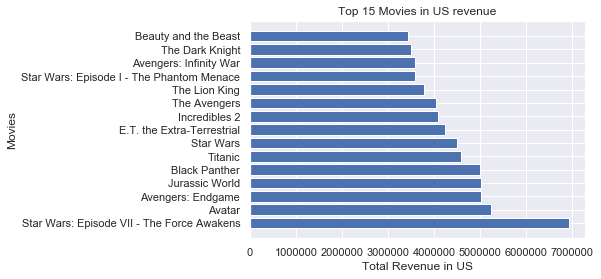

In [42]:
plt.barh(top15_usmovies['title'],top15_usmovies['revenue_usa'])
plt.ylabel("Movies")
plt.title('Top 15 Movies in US revenue')
plt.xlabel("Total Revenue in US")
sns.set()
plt.show()

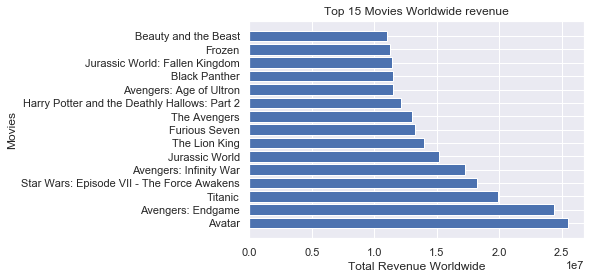

In [43]:
plt.barh(top15_wwmovies['title'],top15_wwmovies['revenue_worlwide'])
plt.ylabel("Movies")
plt.title('Top 15 Movies Worldwide revenue')
plt.xlabel("Total Revenue Worldwide")
sns.set()
plt.show()

# Number of movies

In [81]:
director_summary = movies.groupby('director').agg({'revenue_usa':"mean",'revenue_worlwide':'mean','us_voters_rating':'mean','avg_vote':'mean','director':'count'}).sort_values(by='revenue_worlwide',ascending=False)
director_summary = director_summary.loc[summary_table['director']>1]

The correlation between the number of movies directed and the average revenue in US is 0.11


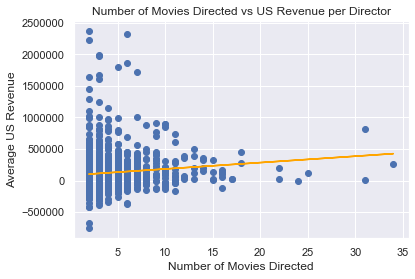

In [84]:
# Movies vs US revenue
plt.scatter(director_summary['director'],director_summary['revenue_usa'])
corr=round(st.pearsonr(director_summary['director'],director_summary['revenue_usa'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue in US is {corr}")
model = st.linregress(director_summary['director'],director_summary['revenue_usa'])
y_values = director_summary['director']*model[0]+model[1]
plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Revenue')
plt.title('Number of Movies Directed vs US Revenue per Director')
sns.set()
plt.show()

The correlation between the number of movies directed and the average revenue Worldwide is 0.15


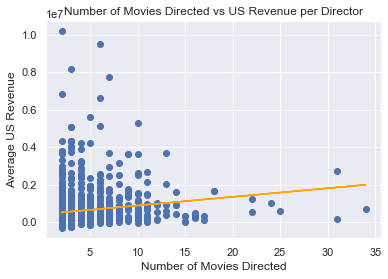

In [83]:
# Movies vs WW revenue
plt.scatter(director_summary['director'],director_summary['revenue_worlwide'])
corr=round(st.pearsonr(director_summary['director'],director_summary['revenue_worlwide'])[0],2)
print(f"The correlation between the number of movies directed and the average revenue Worldwide is {corr}")
model = st.linregress(director_summary['director'],director_summary['revenue_worlwide'])
y_values = director_summary['director']*model[0]+model[1]
plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Revenue')
plt.title('Number of Movies Directed vs Worldwide Revenue per Director')
sns.set()
plt.show()

The correlation between the number of movies directed and the average US Ratings is 0.13


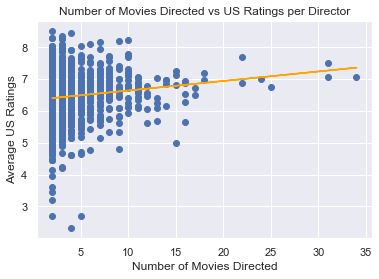

In [86]:
# Movies vs US ratings
plt.scatter(director_summary['director'],director_summary['us_voters_rating'])
corr=round(st.pearsonr(director_summary['director'],director_summary['us_voters_rating'])[0],2)
print(f"The correlation between the number of movies directed and the average US Ratings is {corr}")
model = st.linregress(director_summary['director'],director_summary['us_voters_rating'])
y_values = director_summary['director']*model[0]+model[1]
plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average US Ratings')
plt.title('Number of Movies Directed vs US Ratings per Director')
sns.set()
plt.show()

The correlation between the number of movies directed and the average Worldwide Ratings is 0.14


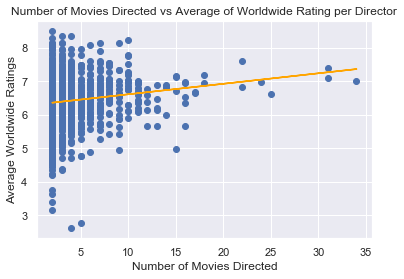

In [87]:
# Movies vs WW ratings
plt.scatter(director_summary['director'],director_summary['avg_vote'])
corr=round(st.pearsonr(director_summary['director'],director_summary['avg_vote'])[0],2)
print(f"The correlation between the number of movies directed and the average Worldwide Ratings is {corr}")
model = st.linregress(director_summary['director'],director_summary['avg_vote'])
y_values = director_summary['director']*model[0]+model[1]
plt.plot(director_summary['director'],y_values,color='orange')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Worldwide Ratings')
plt.title('Number of Movies Directed vs Average of Worldwide Rating per Director')
sns.set()
plt.show()

In [ ]:
recent_director_summary = recent_movies.groupby('director').agg({'revenue_usa':"mean",'revenue_worlwide':'mean','us_voters_rating':'mean','avg_vote':'mean','director':'count'}).sort_values(by='revenue_worlwide',ascending=False)
director_summary = director_summary.loc[summary_table['director']>1]